<a href="https://colab.research.google.com/github/utku-ozcan/Machine_Learning/blob/main/lab2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np

# Define the 2D points
X = np.array([[2, 1, 0], [4, 3, 0]])

# Calculate the covariance matrix
R = np.matmul(X,X.T)/3

# Perform Singular Value Decomposition (SVD)
[U, D, V] = np.linalg.svd(R)

# New basis vectors
u1 = U[:, 0]  # First principal component
u2 = U[:, 1]  # Second principal component

# Calculate the coordinates in the new orthonormal basis
Xi1 = np.matmul(np.transpose(X),u1)
Xi2 = np.matmul(np.transpose(X),u2)
# Reconstruct the approximation of the original points from the new basis
Xaprox = np.matmul(u1[:,None],Xi1[None,:]) + np.matmul(u2[:,None],Xi2[None,:])


print(Xaprox)
print(u1[:,None],u2[:,None])
#print(Xi1[None,:])

[[2. 1. 0.]
 [4. 3. 0.]]
[[-0.40455358]
 [-0.9145143 ]] [[-0.9145143 ]
 [ 0.40455358]]


In [60]:

# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

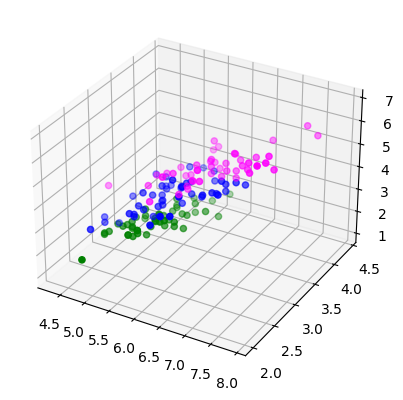

In [61]:

# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,0],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,0],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

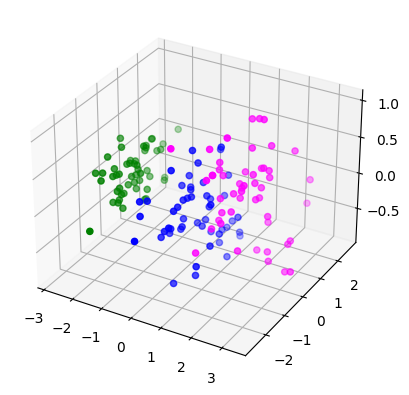

In [62]:

# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler #StandardScaler
from sklearn.preprocessing import StandardScaler

Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

#axes2=plt.axes(projection='3d')
#axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
#axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
#axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')

#from sklearn import decomposition
# define PCA object(three components) , fit and transform the data

from sklearn import decomposition
# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show

In [63]:
pca.explained_variance_


array([2.93808505, 0.9201649 , 0.14774182])

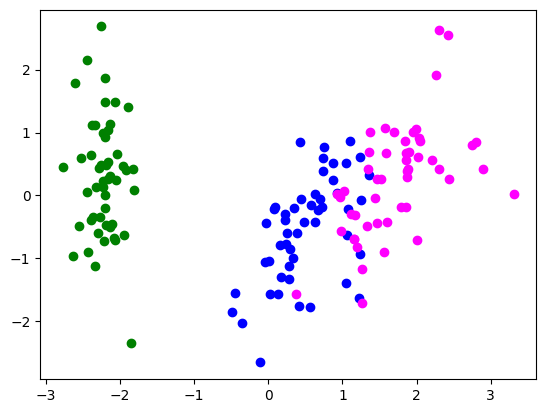

In [64]:
import matplotlib.pyplot as plt

plt.scatter(Xpca[y==0,0],Xpca[y==0,1],color='green')
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],color='blue')
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],color='magenta')

#now the 2nd feature is reduced
#plt.scatter(Xpca[y==0,0],Xpca[y==0,2],color='green')
#plt.scatter(Xpca[y==1,0],Xpca[y==1,2],color='blue')
#plt.scatter(Xpca[y==2,0],Xpca[y==2,2],color='magenta')

(105, 4)
(45, 4)
[[16  0  0]
 [ 0 13  0]
 [ 0  0 16]]


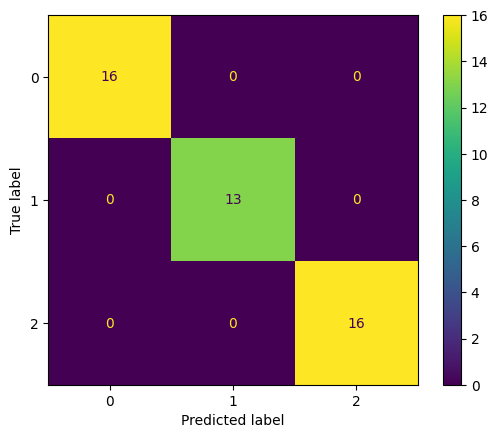

In [65]:

# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



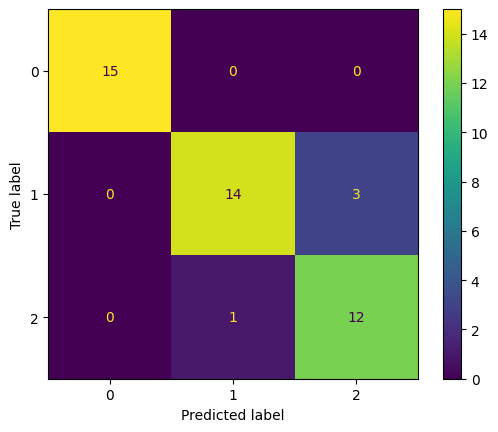

In [66]:
X_trainpca, X_testpca, y_trainpca, y_testpca = train_test_split(Xpca[:,0:2], y, test_size=0.3)

knn2=KNeighborsClassifier(n_neighbors = 3)
knn2.fit(X_trainpca,y_trainpca)
Ypredpca=knn2.predict(X_testpca)
confusion_matrix(y_testpca,Ypredpca)
ConfusionMatrixDisplay.from_predictions(y_testpca,Ypredpca)

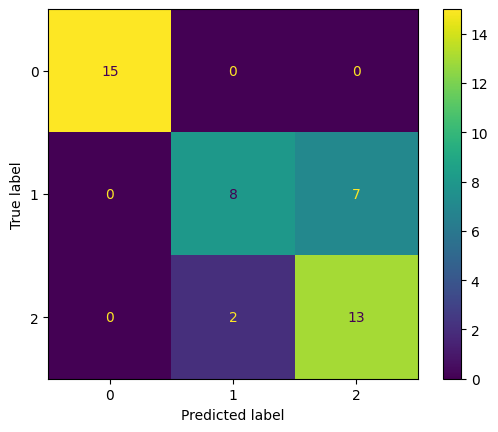

In [67]:
X_trainr, X_testr, y_trainr, y_testr = train_test_split(X[:,0:2], y, test_size=0.3)

knn3=KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_trainr,y_trainr)
Ypredr=knn3.predict(X_testr)
confusion_matrix(y_testr,Ypredr)
ConfusionMatrixDisplay.from_predictions(y_testr,Ypredr)

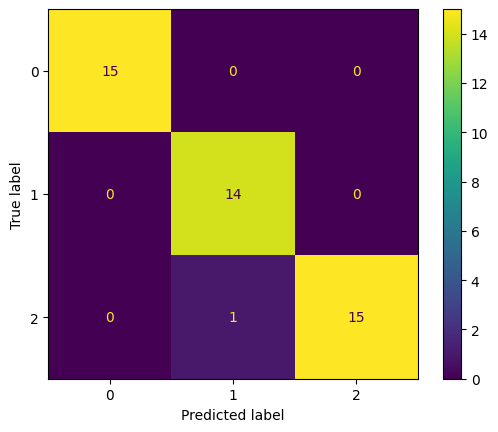

In [68]:

X_trainpca2, X_testpca2, y_trainpca2, y_testpca2 = train_test_split(Xpca[:,0:1], y, test_size=0.3)

knn4=KNeighborsClassifier(n_neighbors = 3)
knn4.fit(X_trainpca2,y_trainpca2)
Ypredpca2=knn4.predict(X_testpca2)
confusion_matrix(y_testpca2,Ypredpca2)
ConfusionMatrixDisplay.from_predictions(y_testpca2,Ypredpca2)
